# Распознавание лиц


Для правильной тренировки необходимо использовать миллионы изображений, и это занимает много времени даже с десятками дорогих графических процессоров.

Вот почему методы, которые не требуют переподготовки на таких больших наборах данных, очень полезны. Трансферное обучение и эмбеддинг являются такими методами.

Методы глубокого обучения требуют много данных для каждого человека. На практике эти данные не всегда доступны.

In [29]:
import tensorflow as tf
import keras
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras import backend as K
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
K.clear_session()

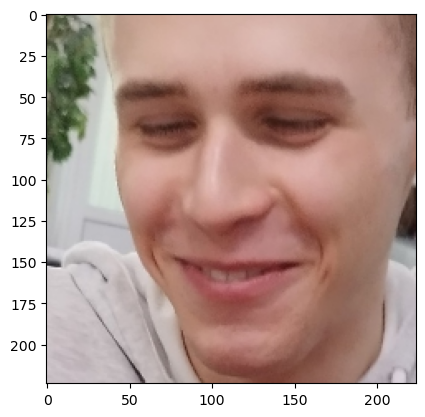

In [20]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('utils/shape_predictor_5_face_landmarks.dat')
img = cv2.cvtColor(cv2.imread("belikov.jpg"), cv2.COLOR_BGR2RGB)
dets = detector(img, 1)
faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection))
image = dlib.get_face_chip(img, faces[0], size=224)
plt.imshow(image)
plt.show()

# VGG16
Распознавание основанное на модели VGG16 (2015)
<img src="notebook_images/vgg_model.png" width="1000"/>
*Архитектура модели*

In [4]:
model = VGGFace(include_top=False, model='vgg16', input_shape=(224, 224, 3), pooling='avg')
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

## Получение эмбеддинга

In [30]:
img = preprocess_input(image.astype(float), version=1)
encoding = model.predict(np.array([img]))[0]
encoding

1/1 [==============================] - 0s 67ms/step


array([9.6152037e-01, 1.4723158e+00, 1.7443573e-01, 6.1464634e+00,
       0.0000000e+00, 1.6240224e+00, 1.1592648e+00, 4.1256061e-01,
       7.1311016e+00, 1.1004585e+00, 5.2903399e+00, 2.1350262e+00,
       5.8131611e-01, 2.8743145e+00, 4.1768436e+00, 1.4172573e+00,
       4.1280019e-01, 4.5495238e+00, 1.8748955e-01, 1.5129488e+00,
       0.0000000e+00, 6.9297013e+00, 4.2054734e+00, 5.3417301e+00,
       5.5863957e+00, 4.4727194e-01, 2.7675894e-01, 0.0000000e+00,
       1.4673867e+00, 0.0000000e+00, 3.2454205e+00, 7.4960647e+00,
       6.8371785e-01, 7.2884220e-01, 8.6943936e-01, 6.0158677e+00,
       3.7612984e+00, 2.6037626e+00, 5.2643600e+00, 1.0020693e+01,
       4.5610352e+00, 6.3269687e-01, 1.0900351e+01, 3.1282499e+00,
       2.1044247e+00, 4.2961502e-01, 1.1476224e+01, 4.2128015e+00,
       9.6182030e-01, 1.4885950e+00, 4.2765083e+00, 3.1014648e-01,
       2.9144990e+00, 6.9325075e-02, 7.2288340e-01, 7.5937110e-01,
       1.5400808e+00, 1.0738231e+00, 5.5588984e-01, 2.8372383e

# Другие варианты сетей

In [ ]:
vggface = VGGFace(model='resnet50')
vggface = VGGFace(model='senet50')